# Importing dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree




url = 'https://raw.githubusercontent.com/Amaniiitd/Fetal-Health-classification/main/Dataset/fetal_health.csv'
df = pd.read_csv(url)
df.head()

baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0           2.0
1           132.0          0.006  ...                 0.0           1.0
2           133.0          0.003  ...                 0.0           1.0
3           134.0          0.003  ...                 1.0           1.0
4           132.0          0.007  ...                 1.0           1.0

[5 rows x 22 columns]

# EDA

In [ ]:
print(df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

count  ...      max
baseline value                                      2126.0  ...  160.000
accelerations                                       2126.0  ...    0.019
fetal_movement                                      2126.0  ...    0.481
uterine_contractions                                2126.0  ...    0.015
light_decelerations                                 2126.0  ...    0.015
severe_decelerations                                2126.0  ...    0.001
prolongued_decelerations                            2126.0  ...    0.005
abnormal_short_term_variability                     2126.0  ...   87.000
mean_value_of_short_term_variability                2126.0  ...    7.000
percentage_of_time_with_abnormal_long_term_vari...  2126.0  ...   91.000
mean_value_of_long_term_variability                 2126.0  ...   50.700
histogram_width                                     2126.0  ...  180.000
histogram_min                                       2126.0  ...  159.000
histogram_max                                       2126.0  ...  238.000
histogram_number_of_peaks                           2126.0  ...   18.000
histogram_number_of_zeroes                          2126.0  ...   10.000
histogram_mode                                      2126.0  ...  187.000
histogram_mean                                      2126.0  ...  182.000
histogram_median                                    2126.0  ...  186.000
histogram_variance                                  2126.0  ...  269.000
histogram_tendency                                  2126.0  ...    1.000
fetal_health                                        2126.0  ...    3.000

[22 rows x 8 columns]

In [ ]:
# Count the missing and null values for dataset fetal healt.
miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

null_values = df.columns[df.isna().any()]
print(f"Null values:\n{df[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [ ]:
#Removing duplicates
dup_df=df.copy()
dup_df.drop_duplicates(inplace=True)
print('Total number of duplicate entries =', df.shape[0] - dup_df.shape[0])
df=dup_df

Total number of duplicate entries = 13


Uniques output classes - [2 1 3] 




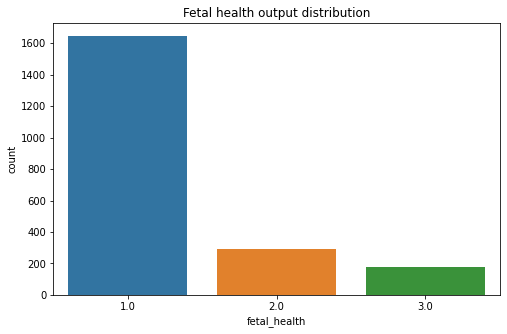

1646 292 175


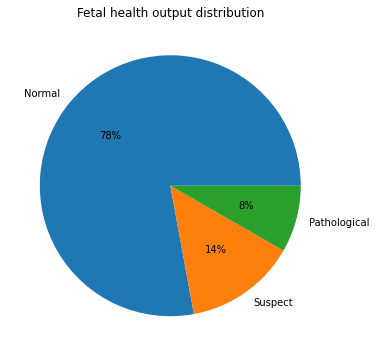

In [ ]:
print('Uniques output classes -',df.fetal_health.unique().astype(int),'\n\n')
plt.figure(figsize=(8,5))
plt.title("Fetal health output distribution")
plt.xlabel("Fetal health")
plt.ylabel("Number of cases")
sb.countplot(data= df, x="fetal_health")
plt.show()


print(df[df.fetal_health==1.0].shape[0], df[df.fetal_health==2.0].shape[0], df[df.fetal_health==3.0].shape[0])
plt.figure(figsize=(6,6))
plt.title("Fetal health output distribution")
plt.pie([df[df.fetal_health==1.0].shape[0], df[df.fetal_health==2.0].shape[0], df[df.fetal_health==3.0].shape[0]], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.show()

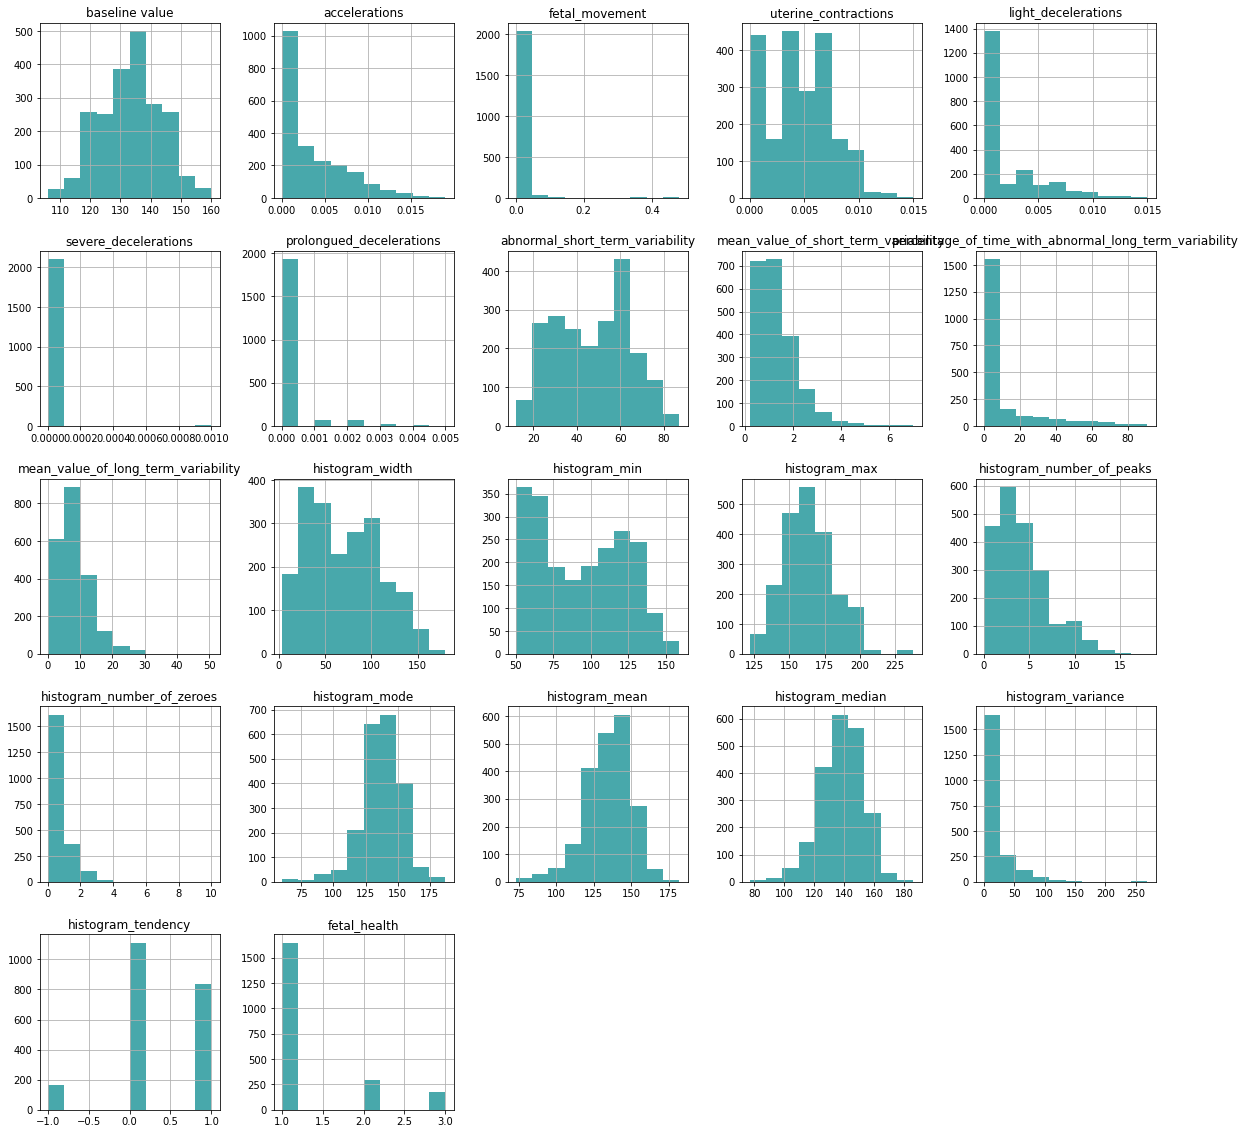

In [ ]:
data_hist_plot = df.hist(figsize = (20,20), color = "#48a8ab")

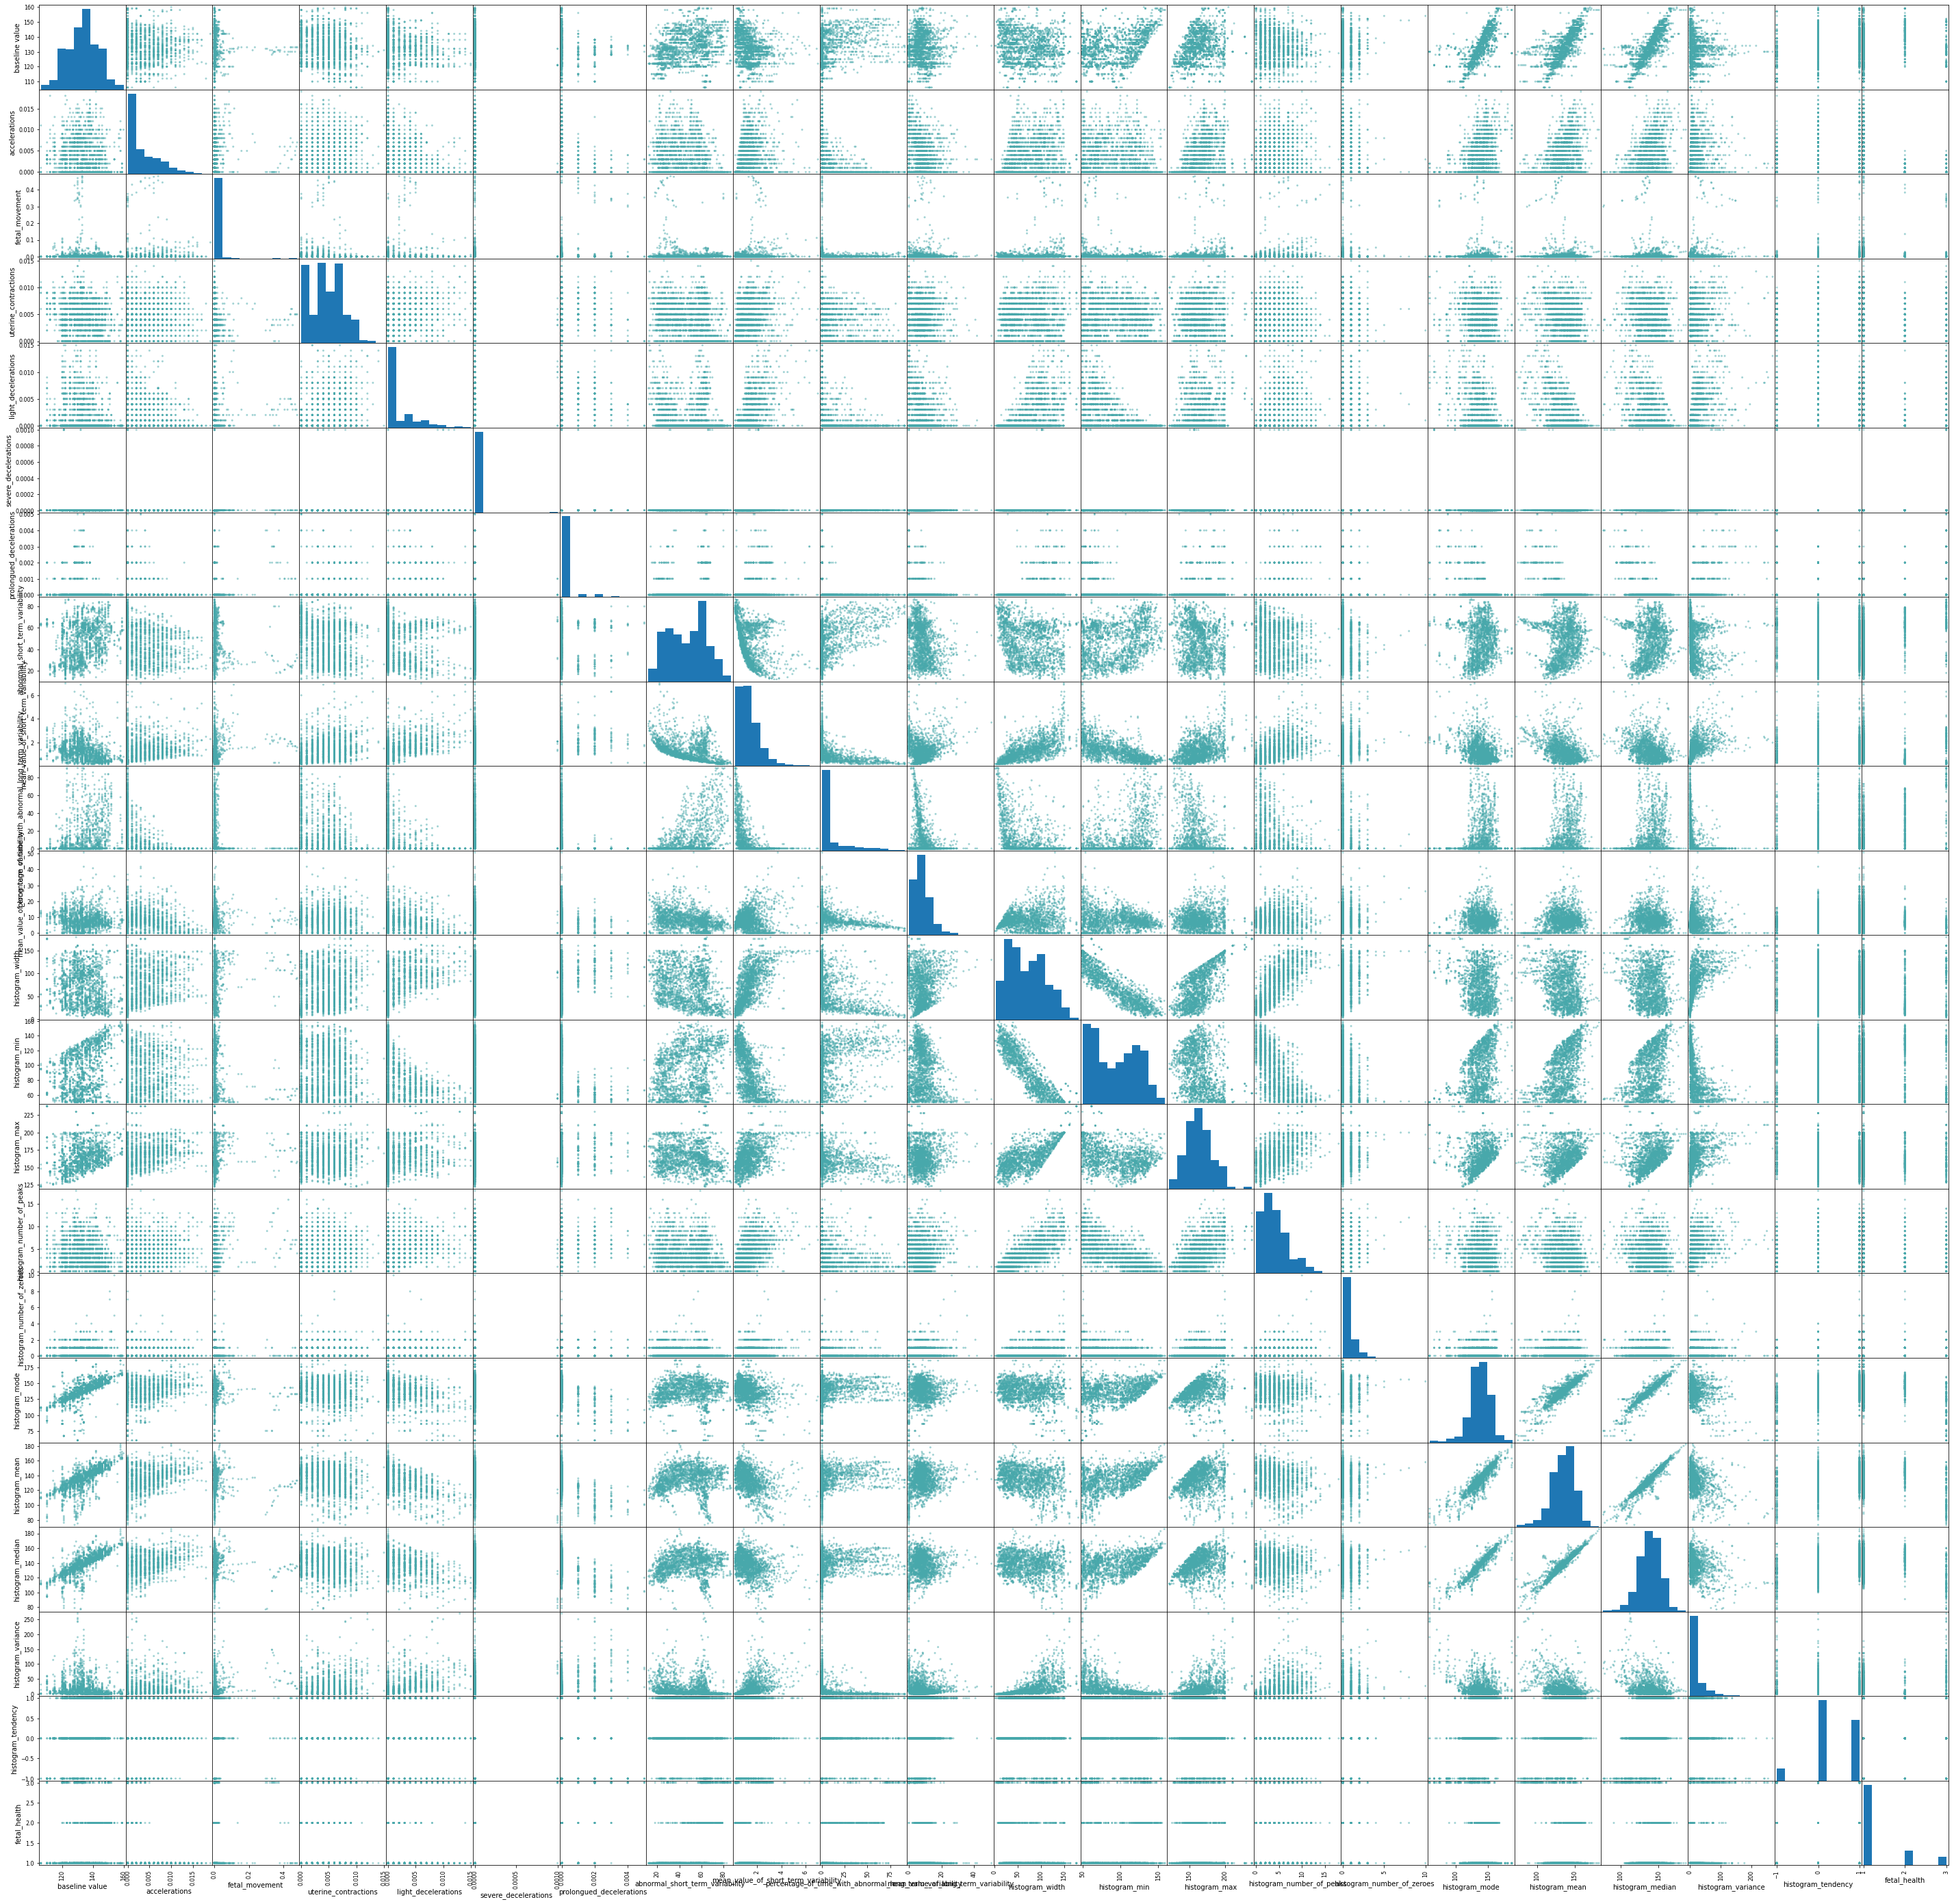

In [ ]:
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(df,figsize=(50, 50), color = "#48a8ab")
plt.show()

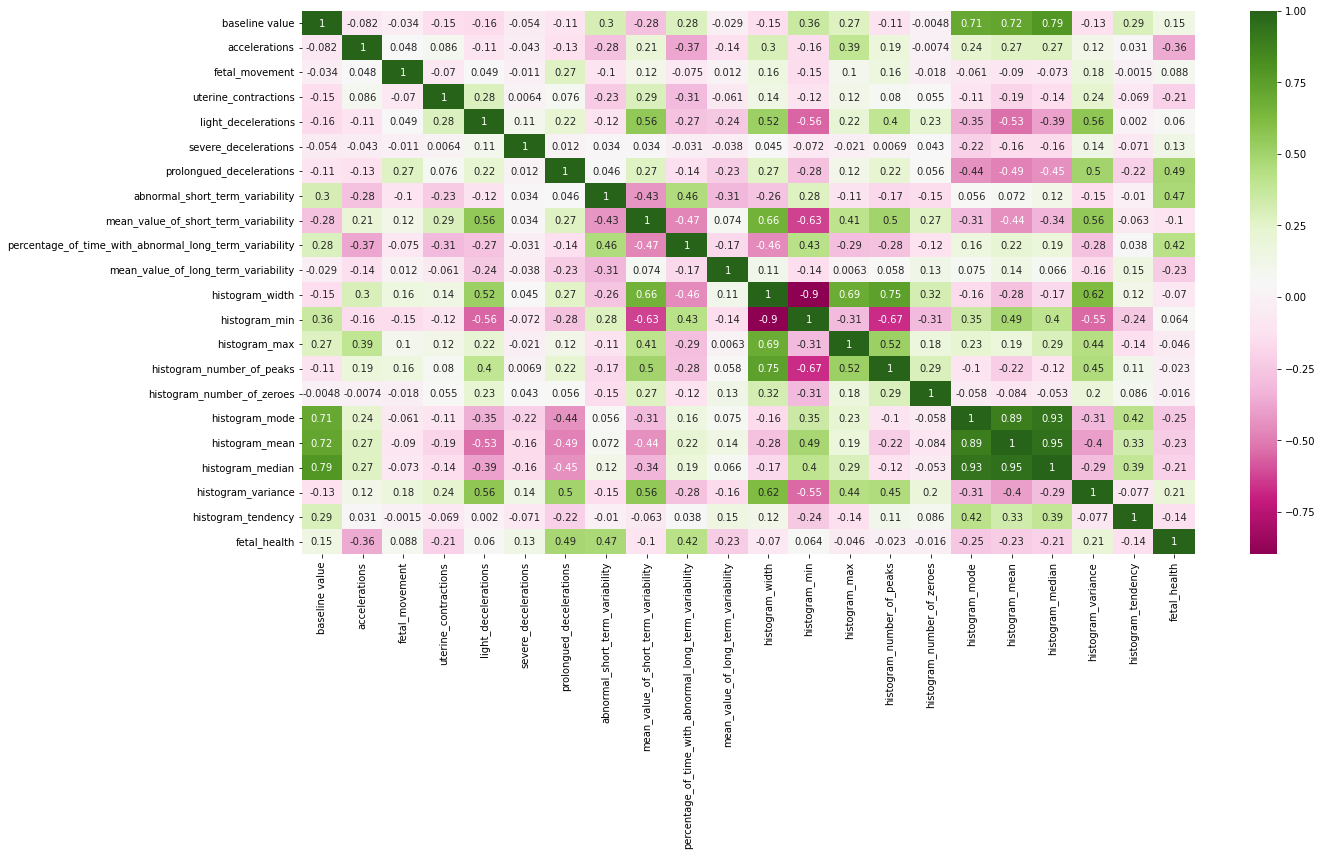

In [ ]:
#Making correlation heatmap
plt.figure(figsize=(20, 10))
dataplot = sb.heatmap(df.corr(), cmap='PiYG', annot=True)
plt.show()

In [ ]:
df.corr().fetal_health.sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.486752
abnormal_short_term_variability                           0.469671
percentage_of_time_with_abnormal_long_term_variability    0.421634
histogram_variance                                        0.208171
baseline value                                            0.146077
severe_decelerations                                      0.132408
fetal_movement                                            0.088057
histogram_min                                             0.063529
light_decelerations                                       0.059651
histogram_number_of_zeroes                               -0.016376
histogram_number_of_peaks                                -0.022856
histogram_max                                            -0.046480
histogram_width                                          -0.069529
mean_value_of_short_term_variability                     -0.10

# Feature Selection

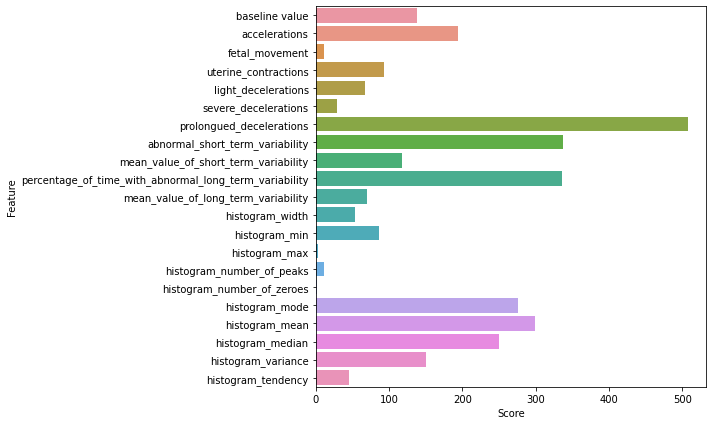

In [ ]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

#Feature Selection
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]
feature_selector = SelectKBest(score_func=f_classif, k='all')
fit = feature_selector.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Plot the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sb.barplot(data=featureScores, x='Score', y='Feature')
plot


In [ ]:
#Selection method
selectedFeatures=featureScores[featureScores['Score']>=50]#Selects features that scored more than 50
selectedFeatures=list(selectedFeatures['Feature'])
selectedFeatures.append('fetal_health')
#Updating the dataframe
df=df[selectedFeatures]
print('Dataset dimensions after feture selection -',df.shape)

df.head()

Dataset dimensions after feture selection - (2113, 16)


baseline value  accelerations  ...  histogram_variance  fetal_health
0           120.0          0.000  ...                73.0           2.0
1           132.0          0.006  ...                12.0           1.0
2           133.0          0.003  ...                13.0           1.0
3           134.0          0.003  ...                13.0           1.0
4           132.0          0.007  ...                11.0           1.0

[5 rows x 16 columns]

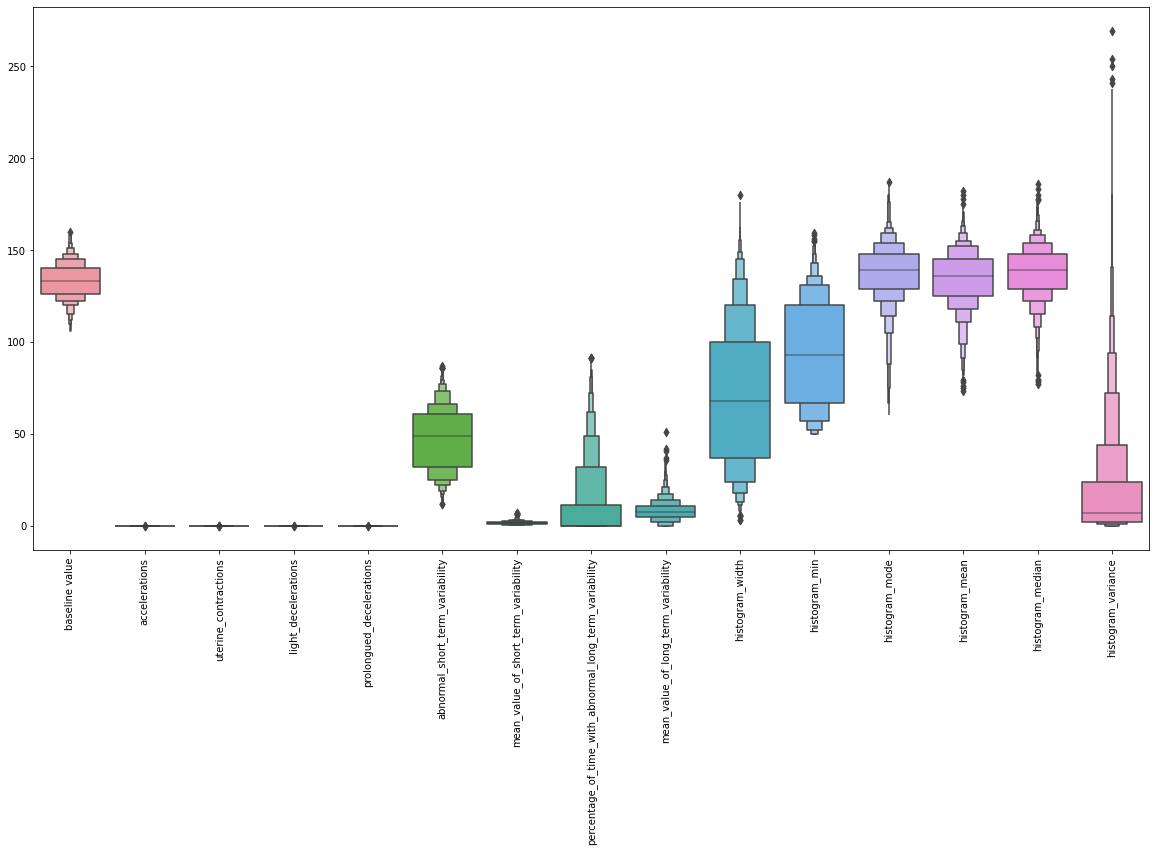

In [ ]:
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]
plt.figure(figsize=(20, 10))
sb.boxenplot(data = X)
plt.xticks(rotation=90)
plt.show()

      baseline value  accelerations  ...  histogram_median  histogram_variance
0          -1.352462      -0.823581  ...         -1.180295            1.862777
1          -0.132634       0.726272  ...          0.131954           -0.237863
2          -0.030982      -0.048654  ...         -0.006178           -0.203426
3           0.070671      -0.048654  ...         -0.075243           -0.203426
4          -0.132634       0.984581  ...         -0.006178           -0.272299
...              ...            ...  ...               ...                 ...
2121        0.680585      -0.823581  ...          0.960743           -0.582230
2122        0.680585      -0.565272  ...          0.891677           -0.547793
2123        0.680585      -0.565272  ...          0.960743           -0.513357
2124        0.680585      -0.565272  ...          0.891677           -0.513357
2125        0.883890      -0.306963  ...          0.477283           -0.616667

[2113 rows x 15 columns]


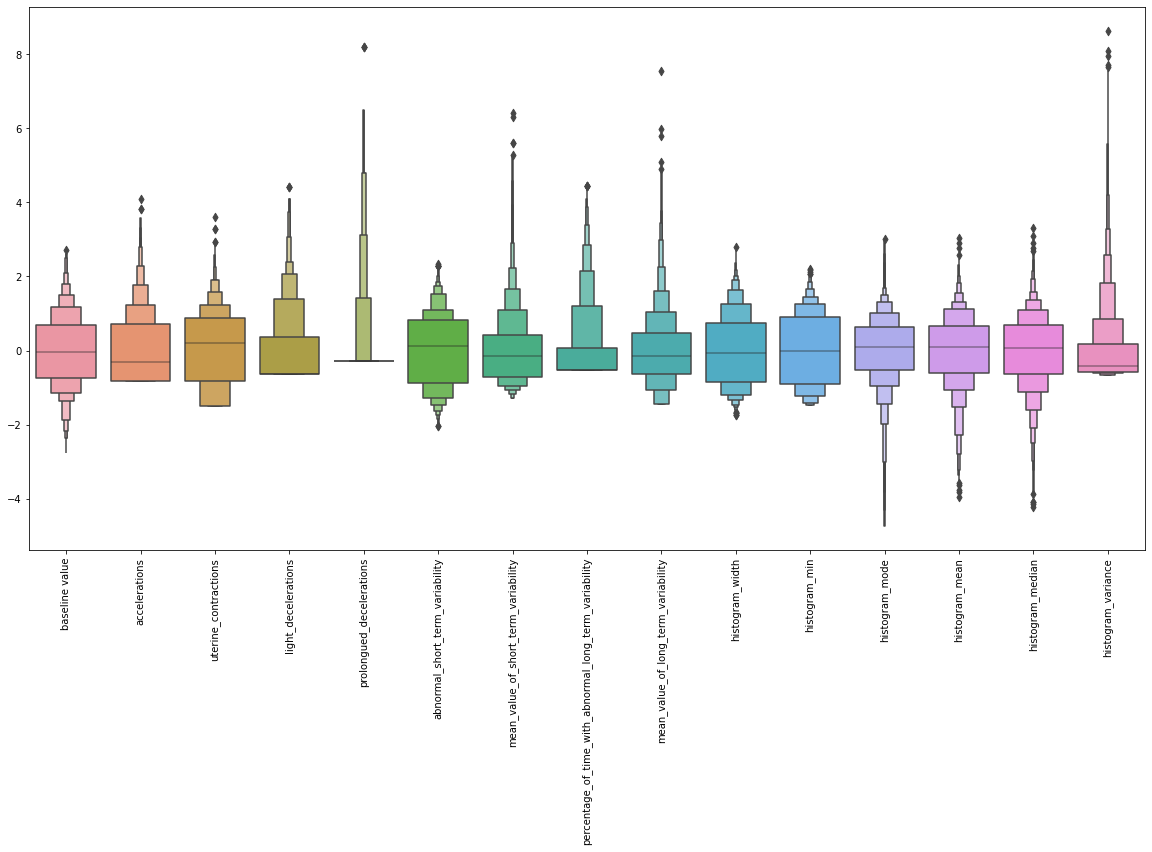

In [ ]:
def feature_standardize(X):
    #calculating the mean
    mu = np.mean(X, axis = 0)  
    
    #calculating the standard deviation
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation
    
    #Normalising the dataset
    X_norm = (X - mu)/sigma

    return X_norm
    
X=feature_standardize(X)
print(X)
plt.figure(figsize=(20, 10))
sb.boxenplot(data = X)
plt.xticks(rotation=90)
plt.show()

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split  

#spliting test and training sets
print('Initial shape of dataset =',X.shape)
print(X.shape)
X_train, X_test, Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print('After split,\nX_train =',X_train.shape, ', Y_train =', Y_train.shape, ', X_test =', X_test.shape, ', Y_test =', Y_test.shape)


Initial shape of dataset = (2113, 15)
(2113, 15)
After split,
X_train = (1479, 15) , Y_train = (1479,) , X_test = (634, 15) , Y_test = (634,)


# Applying models

Confusion Matrix Logistic Regression
Accuracy Model LogisticRegression: 0.889589905362776
              precision    recall  f1-score   support

         1.0      0.938     0.951     0.945       494
         2.0      0.620     0.648     0.633        88
         3.0      0.902     0.712     0.796        52

    accuracy                          0.890       634
   macro avg      0.820     0.770     0.791       634
weighted avg      0.891     0.890     0.889       634



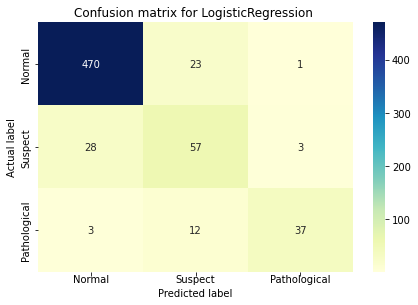

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
prediction_lr = lr.predict(X_test)
print("Confusion Matrix Logistic Regression")
confmatrix_lr = metrics.confusion_matrix(Y_test,prediction_lr)
# print(confm)
# plt.plot(X_test,prediction_lr,color='black',linewidth=3)
# plt.title("LR Plot")
# plt.show()
print("Accuracy Model LogisticRegression:",metrics.accuracy_score(Y_test, prediction_lr))
print(metrics.classification_report(Y_test, prediction_lr, digits=3))
sb.heatmap(pd.DataFrame(confmatrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for LogisticRegression ', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.yticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.show()

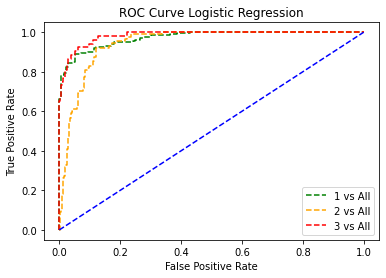

AUC for Logistic Regression Model 0.9692191842326805


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predict_prob = lr.predict_proba(X_test)
# print(predict_prob)
# print(predict_prob[:,0])
# print(predict_prob[:,1])
# print(predict_prob[:,2])

def separate(prediction):
    prediction_1vall = []
    prediction_2vall = []
    prediction_3vall = []
    for i in range(len(prediction)):
        if prediction[i]==1:
            prediction_1vall.append(1)
            prediction_2vall.append(0)
            prediction_3vall.append(0)
        if prediction[i]==2:
            prediction_1vall.append(0)
            prediction_2vall.append(1)
            prediction_3vall.append(0)
        if prediction[i]==3:
            prediction_1vall.append(0)
            prediction_2vall.append(0)
            prediction_3vall.append(1)
    return (prediction_1vall,prediction_2vall,prediction_3vall)

fpr = {}
tpr = {}   
Y_test_1, Y_test_2, Y_test_3 = separate(Y_test.to_list())
# print(Y_test_1)
# print(Y_test_2)
# print(Y_test_3)
fpr[1],tpr[1],_ = roc_curve(Y_test_1,predict_prob[:,0], pos_label=1)
fpr[2],tpr[2],_ = roc_curve(Y_test_2,predict_prob[:,1], pos_label=1)
fpr[3],tpr[3],_ = roc_curve(Y_test_3,predict_prob[:,2], pos_label=1)
# print(_)

plt.plot(fpr[1],tpr[1],linestyle = '--',label='1 vs All',color='green')
plt.plot(fpr[2],tpr[2],linestyle = '--',label='2 vs All',color='orange')
plt.plot(fpr[3],tpr[3],linestyle = '--',label='3 vs All',color='red')
plt.plot([0,1],[0,1],linestyle='--',color='blue')
plt.title("ROC Curve Logistic Regression")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

auc_score = metrics.roc_auc_score(Y_test,predict_prob,multi_class='ovr',average='weighted')
print("AUC for Logistic Regression Model",auc_score)

[[415  65  14]
 [ 10  73   5]
 [  0  22  30]]
Accuracy Model GaussianNB: 0.8170347003154574
Classification Report for Bayes Classifier Model
               precision    recall  f1-score   support

         1.0      0.976     0.840     0.903       494
         2.0      0.456     0.830     0.589        88
         3.0      0.612     0.577     0.594        52

    accuracy                          0.817       634
   macro avg      0.682     0.749     0.695       634
weighted avg      0.874     0.817     0.834       634



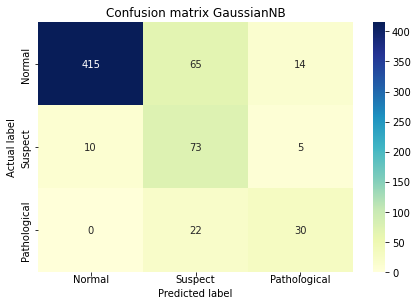

In [ ]:
bayes_model = GaussianNB()
bayes_model.fit(X_train,Y_train)
prediction_bayes = bayes_model.predict(X_test)
# print("Confusion Matrix GaussianNB")
confmatrix_bayes = metrics.confusion_matrix(Y_test,prediction_bayes)
print(confmatrix_bayes)

print("Accuracy Model GaussianNB:",metrics.accuracy_score(Y_test, prediction_bayes))
print("Classification Report for Bayes Classifier Model\n",metrics.classification_report(Y_test, prediction_bayes, digits=3))
sb.heatmap(pd.DataFrame(confmatrix_bayes), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix GaussianNB')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.yticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.show()

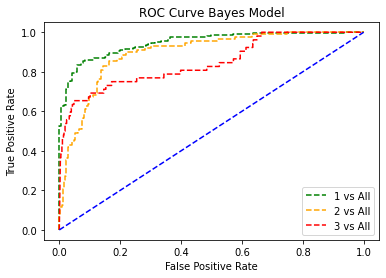

AUC for Bayes Model 0.9317981811136059


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predict_prob = bayes_model.predict_proba(X_test)
# print(predict_prob)
# print(predict_prob[:,0])
# print(predict_prob[:,1])
# print(predict_prob[:,2])

def separate(prediction):
    prediction_1vall = []
    prediction_2vall = []
    prediction_3vall = []
    for i in range(len(prediction)):
        if prediction[i]==1:
            prediction_1vall.append(1)
            prediction_2vall.append(0)
            prediction_3vall.append(0)
        if prediction[i]==2:
            prediction_1vall.append(0)
            prediction_2vall.append(1)
            prediction_3vall.append(0)
        if prediction[i]==3:
            prediction_1vall.append(0)
            prediction_2vall.append(0)
            prediction_3vall.append(1)
    return (prediction_1vall,prediction_2vall,prediction_3vall)

fpr = {}
tpr = {}   
Y_test_1, Y_test_2, Y_test_3 = separate(Y_test.to_list())
# print(Y_test_1)
# print(Y_test_2)
# print(Y_test_3)
fpr[1],tpr[1],_ = roc_curve(Y_test_1,predict_prob[:,0], pos_label=1)
fpr[2],tpr[2],_ = roc_curve(Y_test_2,predict_prob[:,1], pos_label=1)
fpr[3],tpr[3],_ = roc_curve(Y_test_3,predict_prob[:,2], pos_label=1)
# print(_)

plt.plot(fpr[1],tpr[1],linestyle = '--',label='1 vs All',color='green')
plt.plot(fpr[2],tpr[2],linestyle = '--',label='2 vs All',color='orange')
plt.plot(fpr[3],tpr[3],linestyle = '--',label='3 vs All',color='red')
plt.plot([0,1],[0,1],linestyle='--',color='blue')
plt.title("ROC Curve Bayes Model")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

auc_score = metrics.roc_auc_score(Y_test,predict_prob,multi_class='ovr',average='weighted')
print("AUC for Bayes Model",auc_score)

Accuracy of DTC Model: 0.9305993690851735
Classification Report of DTC Model:
               precision    recall  f1-score   support

         1.0      0.952     0.964     0.958       494
         2.0      0.819     0.773     0.795        88
         3.0      0.902     0.885     0.893        52

    accuracy                          0.931       634
   macro avg      0.891     0.874     0.882       634
weighted avg      0.929     0.931     0.930       634

14


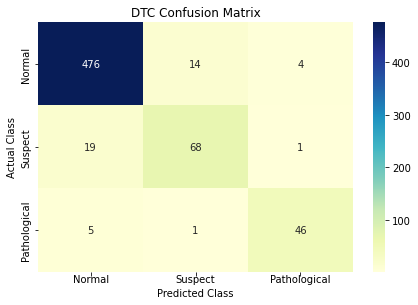

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=14,random_state=24)
dtc.fit(X_train,Y_train)
prediction = dtc.predict(X_test)
# print(prediction)
confmatrix = metrics.confusion_matrix(Y_test,prediction)
# print(confmatrix)
accuracy = metrics.accuracy_score(Y_test,prediction)
print("Accuracy of DTC Model:",accuracy)

classification_rep = metrics.classification_report(Y_test,prediction,digits=3)
print("Classification Report of DTC Model:\n",classification_rep)
print(dtc.get_depth())

sb.heatmap(pd.DataFrame(confmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title("DTC Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.xticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.yticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.show()

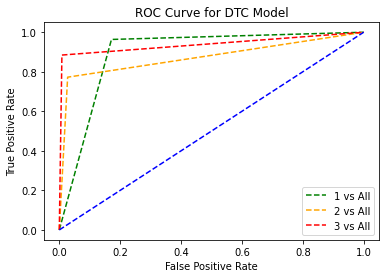

AUC for DTC Model 0.8962539179034024


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predict_prob = dtc.predict_proba(X_test)
# print(predict_prob)
# print(predict_prob[:,0])
# print(predict_prob[:,1])
# print(predict_prob[:,2])

def separate(prediction):
    prediction_1vall = []
    prediction_2vall = []
    prediction_3vall = []
    for i in range(len(prediction)):
        if prediction[i]==1:
            prediction_1vall.append(1)
            prediction_2vall.append(0)
            prediction_3vall.append(0)
        if prediction[i]==2:
            prediction_1vall.append(0)
            prediction_2vall.append(1)
            prediction_3vall.append(0)
        if prediction[i]==3:
            prediction_1vall.append(0)
            prediction_2vall.append(0)
            prediction_3vall.append(1)
    return (prediction_1vall,prediction_2vall,prediction_3vall)

fpr = {}
tpr = {}   
Y_test_1, Y_test_2, Y_test_3 = separate(Y_test.to_list())
# print(Y_test_1)
# print(Y_test_2)
# print(Y_test_3)
fpr[1],tpr[1],_ = roc_curve(Y_test_1,predict_prob[:,0], pos_label=1)
fpr[2],tpr[2],_ = roc_curve(Y_test_2,predict_prob[:,1], pos_label=1)
fpr[3],tpr[3],_ = roc_curve(Y_test_3,predict_prob[:,2], pos_label=1)
# print(_)

plt.plot(fpr[1],tpr[1],linestyle = '--',label='1 vs All',color='green')
plt.plot(fpr[2],tpr[2],linestyle = '--',label='2 vs All',color='orange')
plt.plot(fpr[3],tpr[3],linestyle = '--',label='3 vs All',color='red')
plt.plot([0,1],[0,1],linestyle='--',color='blue')
plt.title("ROC Curve for DTC Model")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

auc_score = metrics.roc_auc_score(Y_test,predict_prob,multi_class='ovr',average='weighted')
print("AUC for DTC Model",auc_score)

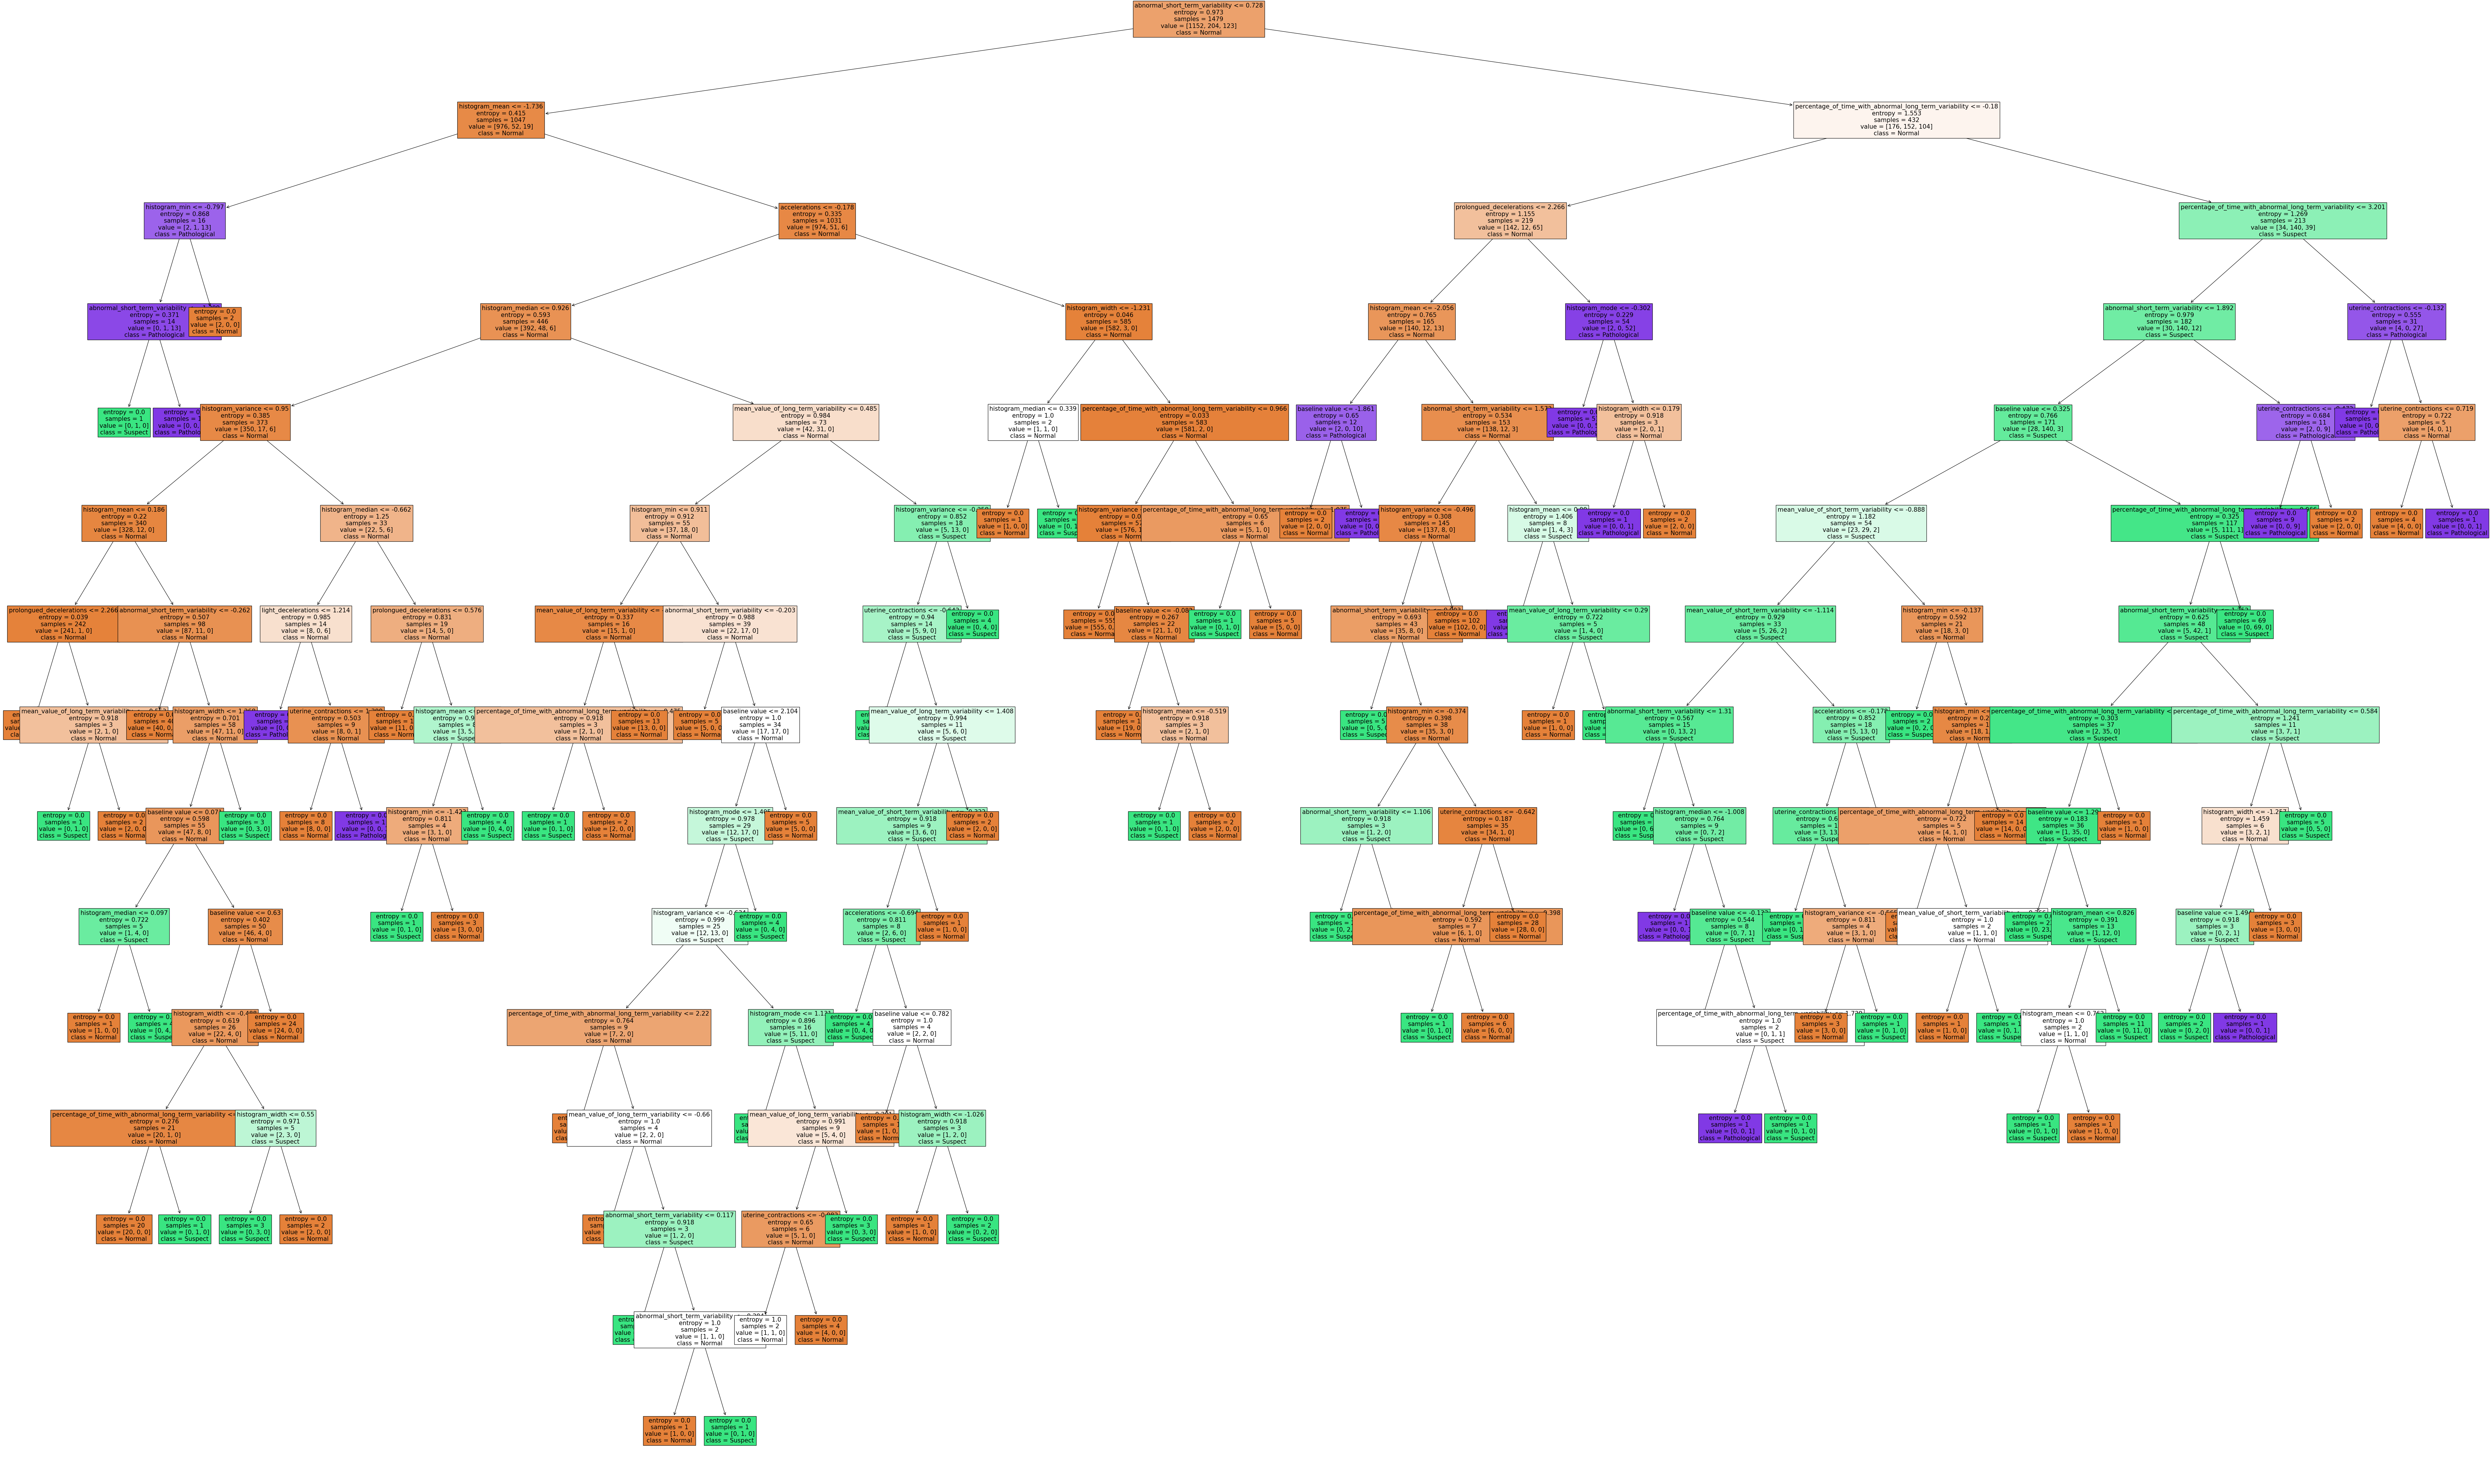

In [ ]:
features = X.columns
features = features.to_list()
plt.figure(figsize=(80,50),dpi=100)
tree.plot_tree(dtc,feature_names=features,class_names=["Normal","Suspect","Pathological"],fontsize=15,filled=True)
plt.savefig("DecisionTree.png")

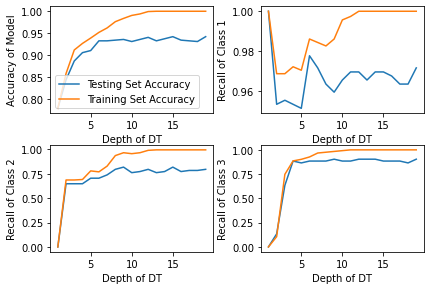

<Figure size 7200x7200 with 0 Axes>

In [ ]:
depths = []
accuracies = []
recall_1 = []
recall_2 = []
recall_3 = []
# print("Testing Set")
for i in range(1,20):
    dtc_depth_i = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtc_depth_i.fit(X_train,Y_train)
    prediction_i = dtc_depth_i.predict(X_test)
    accuracy_i = metrics.accuracy_score(Y_test,prediction_i)
    depths.append(i)
    accuracies.append(accuracy_i)
    predict_prob = dtc_depth_i.predict_proba(X_test)
    classification_rep = metrics.classification_report(Y_test,prediction_i,output_dict=True,zero_division=0)
    # print(classification_rep)
    recall_1.append(classification_rep['1.0']['recall'])
    recall_2.append(classification_rep['2.0']['recall'])
    recall_3.append(classification_rep['3.0']['recall'])
    
    # print("Accuracy of DTC Model with depth = %d:"%i,accuracy_i)
    # print("Recall Class 2 of DTC Model with depth = %d:"%i,recall_2[i-1])
    # print("Recall Class 3 of DTC Model with depth = %d:"%i,recall_3[i-1])
    # classification_rep = metrics.classification_report(Y_test,prediction_i,digits=3)
    # print("Classification Report of DTC Model with depth = %d:\n"%i,classification_rep)
    


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
plt.figure(figsize=(100,100))
fig.tight_layout()
accuracies = np.array(accuracies)
errors = 1 - accuracies
ax1.plot(depths,accuracies,label='Testing Set Accuracy')
ax1.set_ylabel("Accuracy of Model")
ax1.set_xlabel("Depth of DT")
# ax1.set_ylim((0.6,1))

ax2.plot(depths,recall_1)
ax2.set_ylabel("Recall of Class 1")
ax2.set_xlabel("Depth of DT")
# ax2.set_ylim((0.6,1))

ax3.plot(depths,recall_2)
ax3.set_ylabel("Recall of Class 2")
ax3.set_xlabel("Depth of DT")
# ax3.set_ylim((0.6,1))

ax4.plot(depths,recall_3)
ax4.set_ylabel("Recall of Class 3")
ax4.set_xlabel("Depth of DT")
# ax4.set_ylim((0.6,1))

depths = []
accuracies = []
recall_1 = []
recall_2 = []
recall_3 = []
# print("Training Set")
for i in range(1,20):
    dtc_depth_i = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtc_depth_i.fit(X_train,Y_train)
    prediction_i = dtc_depth_i.predict(X_train)
    accuracy_i = metrics.accuracy_score(Y_train,prediction_i)
    depths.append(i)
    accuracies.append(accuracy_i)
    classification_rep = metrics.classification_report(Y_train,prediction_i,output_dict=True,zero_division=0)
    predict_prob = dtc_depth_i.predict_proba(X_test)
    recall_1.append(classification_rep['1.0']['recall'])
    recall_2.append(classification_rep['2.0']['recall'])
    recall_3.append(classification_rep['3.0']['recall'])
    # print("Accuracy of DTC Model with depth = %d:"%i,accuracy_i)
    # classification_rep = metrics.classification_report(Y_train,prediction_i,digits=3)
    # print("Classification Report of DTC Model with depth = %d:\n"%i,classification_rep)
    


# fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
# plt.figure(figsize=(100,100))
# fig.tight_layout()
accuracies = np.array(accuracies)
errors = 1 - accuracies
ax1.plot(depths,accuracies,label='Training Set Accuracy')
ax1.set_ylabel("Accuracy of Model")
ax1.set_xlabel("Depth of DT")
# ax1.set_ylim((0.6,1))

ax2.plot(depths,recall_1)
ax2.set_ylabel("Recall of Class 1")
ax2.set_xlabel("Depth of DT")
# ax2.set_ylim((0.6,1))

ax3.plot(depths,recall_2)
ax3.set_ylabel("Recall of Class 2")
ax3.set_xlabel("Depth of DT")
# ax3.set_ylim((0.6,1))

ax4.plot(depths,recall_3)
ax4.set_ylabel("Recall of Class 3")
ax4.set_xlabel("Depth of DT")
# ax4.set_ylim((0.6,1))

# plt.legend(['Orange : Testing','Blue: Training'])
ax1.legend(loc='best')


The number of decision trees in forest 100
Accuracy Model RFC: 0.9416403785488959
Classification Report of RFC Model
               precision    recall  f1-score   support

         1.0      0.951     0.980     0.965       494
         2.0      0.844     0.739     0.788        88
         3.0      1.000     0.923     0.960        52

    accuracy                          0.942       634
   macro avg      0.932     0.880     0.904       634
weighted avg      0.940     0.942     0.940       634



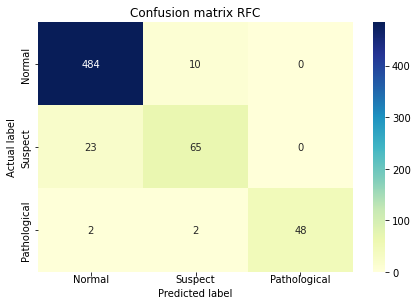

In [ ]:
rfc= RandomForestClassifier(criterion='entropy',random_state=42)
rfc.fit(X_train,Y_train)
prediction_rfc = rfc.predict(X_test)
# print("Confusion Matrix RFC")
confmatrix_rfc = metrics.confusion_matrix(Y_test,prediction_rfc)
print("The number of decision trees in forest",rfc.n_estimators)

# plt.plot(X_test,prediction_rfc,color='black',linewidth=3)
# plt.title('RFC plot')
# plt.show()

print("Accuracy Model RFC:",metrics.accuracy_score(Y_test, prediction_rfc))
print("Classification Report of RFC Model\n",metrics.classification_report(Y_test, prediction_rfc, digits=3))
sb.heatmap(pd.DataFrame(confmatrix_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix RFC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.yticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.show()

RandomForestClassifier(class_weight='balanced', n_estimators=71)
0.934418231791113
{'n_estimators': 71}
Accuracy Model RFC: 0.9384858044164038
              precision    recall  f1-score   support

         1.0      0.951     0.980     0.965       494
         2.0      0.823     0.739     0.778        88
         3.0      1.000     0.885     0.939        52

    accuracy                          0.938       634
   macro avg      0.925     0.868     0.894       634
weighted avg      0.937     0.938     0.937       634



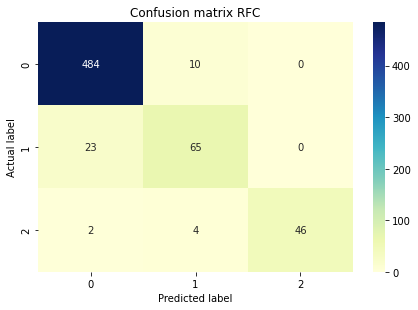

In [ ]:
estimators = [i for i in range(1,100,10)]
para = {'n_estimators':estimators}
rfc_best = RandomForestClassifier(class_weight='balanced')
grid = GridSearchCV(rfc_best,para,cv=5,scoring='accuracy')
grid.fit(X_train,Y_train)
prediction_best = grid.predict(X_test)
confmatrix_best = metrics.confusion_matrix(Y_test,prediction_best)
# print("The number of decision trees in forest",grid.param_grid)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)
print("Accuracy Model RFC:",metrics.accuracy_score(Y_test, prediction_best))
print(metrics.classification_report(Y_test, prediction_best, digits=3))
sb.heatmap(pd.DataFrame(confmatrix_best), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix RFC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

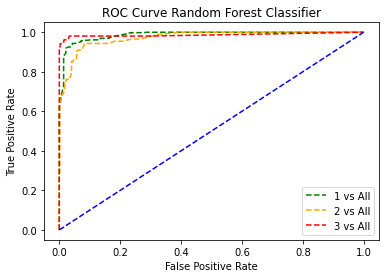

AUC for RFC Model 0.9850019110779624


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predict_prob = rfc.predict_proba(X_test)
# print(predict_prob)
# print(predict_prob[:,0])
# print(predict_prob[:,1])
# print(predict_prob[:,2])

def separate(prediction):
    prediction_1vall = []
    prediction_2vall = []
    prediction_3vall = []
    for i in range(len(prediction)):
        if prediction[i]==1:
            prediction_1vall.append(1)
            prediction_2vall.append(0)
            prediction_3vall.append(0)
        if prediction[i]==2:
            prediction_1vall.append(0)
            prediction_2vall.append(1)
            prediction_3vall.append(0)
        if prediction[i]==3:
            prediction_1vall.append(0)
            prediction_2vall.append(0)
            prediction_3vall.append(1)
    return (prediction_1vall,prediction_2vall,prediction_3vall)

fpr = {}
tpr = {}   
Y_test_1, Y_test_2, Y_test_3 = separate(Y_test.to_list())
# print(Y_test_1)
# print(Y_test_2)
# print(Y_test_3)
fpr[1],tpr[1],_ = roc_curve(Y_test_1,predict_prob[:,0], pos_label=1)
fpr[2],tpr[2],_ = roc_curve(Y_test_2,predict_prob[:,1], pos_label=1)
fpr[3],tpr[3],_ = roc_curve(Y_test_3,predict_prob[:,2], pos_label=1)
# print(_)

plt.plot(fpr[1],tpr[1],linestyle = '--',label='1 vs All',color='green')
plt.plot(fpr[2],tpr[2],linestyle = '--',label='2 vs All',color='orange')
plt.plot(fpr[3],tpr[3],linestyle = '--',label='3 vs All',color='red')
plt.plot([0,1],[0,1],linestyle='--',color='blue')
plt.title("ROC Curve Random Forest Classifier")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

auc_score = metrics.roc_auc_score(Y_test,predict_prob,multi_class='ovr',average='weighted')
print("AUC for RFC Model",auc_score)

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# print(X)
# X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# counter = Counter(Y_train)
# print("Count 1",counter)

# oversample = SMOTE()
# X_train, Y_train = oversample.fit_resample(X_train,Y_train)

# counter = Counter(Y_train)
# print("Count 2",counter)

# dtc = DecisionTreeClassifier(criterion='entropy')
# dtc.fit(X_train,Y_train)
# prediction = dtc.predict(X_test)
# confmatrix = metrics.confusion_matrix(Y_test,prediction)
# print(confmatrix)
# accuracy = metrics.accuracy_score(Y_test,prediction)
# print("Accuracy of DTC Model:",accuracy)

# classification_rep = metrics.classification_report(Y_test,prediction,digits=3)
# print("Classification Report of DTC Model:\n",classification_rep)
# print("Depth of Decision Tree",dtc.get_depth())

# sb.heatmap(pd.DataFrame(confmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
# plt.tight_layout()
# plt.title("DTC Confusion Matrix")
# plt.ylabel("Actual Class")
# plt.xlabel("Predicted Class")
# plt.xticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
# plt.yticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
# plt.show()

In [ ]:
# depths = []
# accuracies = []
# recall_1 = []
# recall_2 = []
# recall_3 = []
# print("Testing Set Accuracies")
# for i in range(1,20):
#     dtc_depth_i = DecisionTreeClassifier(min_samples_leaf=i)
#     dtc_depth_i.fit(X_train,Y_train)
#     prediction_i = dtc_depth_i.predict(X_test)
#     accuracy_i = metrics.accuracy_score(Y_test,prediction_i)
#     depths.append(i)
#     accuracies.append(accuracy_i)
#     classification_rep = metrics.classification_report(Y_test,prediction_i,output_dict=True,zero_division=0)
#     # print(classification_rep)
#     recall_1.append(classification_rep['1.0']['recall'])
#     recall_2.append(classification_rep['2.0']['recall'])
#     recall_3.append(classification_rep['3.0']['recall'])
#     print("Accuracy of DTC Model with depth = %d:"%i,accuracy_i)
#     # classification_rep = metrics.classification_report(Y_test,prediction_i,digits=3)
#     # print("Classification Report of DTC Model with depth = %d:\n"%i,classification_rep)
    


# fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
# plt.figure(figsize=(100,100))
# fig.tight_layout()
# accuracies = np.array(accuracies)
# errors = 1 - accuracies
# ax1.plot(depths,accuracies,label='Testing Set Accuracy')
# ax1.set_ylabel("Accuracy of Model")
# ax1.set_xlabel("Depth of DT")
# ax1.set_ylim((0.6,1))

# ax2.plot(depths,recall_1)
# ax2.set_ylabel("Recall of Class 1")
# ax2.set_xlabel("Depth of DT")
# ax2.set_ylim((0.6,1))

# ax3.plot(depths,recall_2)
# ax3.set_ylabel("Recall of Class 2")
# ax3.set_xlabel("Depth of DT")
# ax3.set_ylim((0.6,1))

# ax4.plot(depths,recall_3)
# ax4.set_ylabel("Recall of Class 3")
# ax4.set_xlabel("Depth of DT")
# ax4.set_ylim((0.6,1))

# depths = []
# accuracies = []
# recall_1 = []
# recall_2 = []
# recall_3 = []
# print("Training Set Accuracies")
# for i in range(1,20):
#     dtc_depth_i = DecisionTreeClassifier(min_samples_leaf=i)
#     dtc_depth_i.fit(X_train,Y_train)
#     prediction_i = dtc_depth_i.predict(X_train)
#     accuracy_i = metrics.accuracy_score(Y_train,prediction_i)
#     depths.append(i)
#     accuracies.append(accuracy_i)
#     classification_rep = metrics.classification_report(Y_train,prediction_i,output_dict=True,zero_division=0)
    
#     recall_1.append(classification_rep['1.0']['recall'])
#     recall_2.append(classification_rep['2.0']['recall'])
#     recall_3.append(classification_rep['3.0']['recall'])
#     print("Accuracy of DTC Model with depth = %d:"%i,accuracy_i)
#     # classification_rep = metrics.classification_report(Y_train,prediction_i,digits=3)
#     # print("Classification Report of DTC Model with depth = %d:\n"%i,classification_rep)
    


# # fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
# # plt.figure(figsize=(100,100))
# # fig.tight_layout()
# accuracies = np.array(accuracies)
# errors = 1 - accuracies
# ax1.plot(depths,accuracies,label='Training Set Accuracy')
# ax1.set_ylabel("Accuracy of Model")
# ax1.set_xlabel("Depth of DT")
# ax1.set_ylim((0.6,1))

# ax2.plot(depths,recall_1)
# ax2.set_ylabel("Recall of Class 1")
# ax2.set_xlabel("Depth of DT")
# ax2.set_ylim((0.6,1))

# ax3.plot(depths,recall_2)
# ax3.set_ylabel("Recall of Class 2")
# ax3.set_xlabel("Depth of DT")
# ax3.set_ylim((0.6,1))

# ax4.plot(depths,recall_3)
# ax4.set_ylabel("Recall of Class 3")
# ax4.set_xlabel("Depth of DT")
# ax4.set_ylim((0.6,1))

# # plt.legend(['Orange : Testing','Blue: Training'])
# ax1.legend(loc='best')

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf',C=100,probability=True)
clf_svm.fit(X_train, Y_train)
y_pred = clf_svm.predict(X_test)


Accuracy Model SVM: 0.9353312302839116
Classification Report of SVM Model
               precision    recall  f1-score   support

         1.0      0.956     0.976     0.966       494
         2.0      0.807     0.761     0.784        88
         3.0      0.936     0.846     0.889        52

    accuracy                          0.935       634
   macro avg      0.900     0.861     0.879       634
weighted avg      0.934     0.935     0.934       634



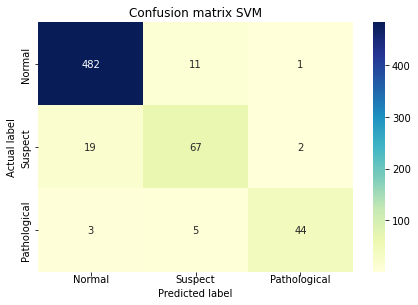

In [ ]:
from sklearn import metrics
confmatrix_svm = metrics.confusion_matrix(Y_test,y_pred)

print("Accuracy Model SVM:",metrics.accuracy_score(Y_test, y_pred))
print("Classification Report of SVM Model\n",metrics.classification_report(Y_test, y_pred, digits=3))
sb.heatmap(pd.DataFrame(confmatrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.yticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.show()

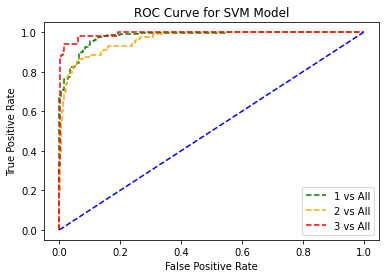

AUC for SVM Model 0.9776363018208281


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predict_prob = clf_svm.predict_proba(X_test)

def separate(prediction):
    prediction_1vall = []
    prediction_2vall = []
    prediction_3vall = []
    for i in range(len(prediction)):
        if prediction[i]==1:
            prediction_1vall.append(1)
            prediction_2vall.append(0)
            prediction_3vall.append(0)
        if prediction[i]==2:
            prediction_1vall.append(0)
            prediction_2vall.append(1)
            prediction_3vall.append(0)
        if prediction[i]==3:
            prediction_1vall.append(0)
            prediction_2vall.append(0)
            prediction_3vall.append(1)
    return (prediction_1vall,prediction_2vall,prediction_3vall)

fpr = {}
tpr = {}   
Y_test_1, Y_test_2, Y_test_3 = separate(Y_test.to_list())

fpr[1],tpr[1],_ = roc_curve(Y_test_1,predict_prob[:,0], pos_label=1)
fpr[2],tpr[2],_ = roc_curve(Y_test_2,predict_prob[:,1], pos_label=1)
fpr[3],tpr[3],_ = roc_curve(Y_test_3,predict_prob[:,2], pos_label=1)

plt.plot(fpr[1],tpr[1],linestyle = '--',label='1 vs All',color='green')
plt.plot(fpr[2],tpr[2],linestyle = '--',label='2 vs All',color='orange')
plt.plot(fpr[3],tpr[3],linestyle = '--',label='3 vs All',color='red')
plt.plot([0,1],[0,1],linestyle='--',color='blue')
plt.title("ROC Curve for SVM Model")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

auc_score = metrics.roc_auc_score(Y_test,predict_prob,multi_class='ovr',average='weighted')
print("AUC for SVM Model",auc_score)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
clf = MLPClassifier(hidden_layer_sizes=(16,32,64,128,256), activation='relu',random_state=1, max_iter=1000 ).fit(X_train, Y_train)
y_pred=clf.predict(X_test)

Accuracy Model MLP: 0.9321766561514195
Classification Report of MLP Model
               precision    recall  f1-score   support

         1.0      0.949     0.980     0.964       494
         2.0      0.831     0.670     0.742        88
         3.0      0.906     0.923     0.914        52

    accuracy                          0.932       634
   macro avg      0.895     0.858     0.874       634
weighted avg      0.929     0.932     0.929       634



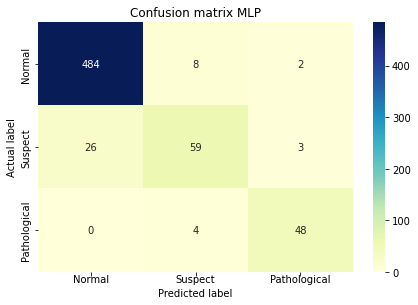

In [ ]:
from sklearn import metrics
confmatrix_MLP = metrics.confusion_matrix(Y_test,y_pred)

print("Accuracy Model MLP:",metrics.accuracy_score(Y_test, y_pred))
print("Classification Report of MLP Model\n",metrics.classification_report(Y_test, y_pred, digits=3))
sb.heatmap(pd.DataFrame(confmatrix_MLP), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix MLP')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.yticks(np.arange(3)+0.5,("Normal","Suspect","Pathological"),va='center')
plt.show()

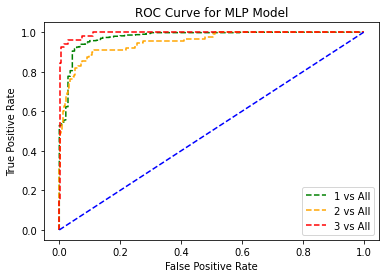

AUC for MLP Model 0.973575630441301


In [ ]:
predict_prob = clf.predict_proba(X_test)

def separate(prediction):
    prediction_1vall = []
    prediction_2vall = []
    prediction_3vall = []
    for i in range(len(prediction)):
        if prediction[i]==1:
            prediction_1vall.append(1)
            prediction_2vall.append(0)
            prediction_3vall.append(0)
        if prediction[i]==2:
            prediction_1vall.append(0)
            prediction_2vall.append(1)
            prediction_3vall.append(0)
        if prediction[i]==3:
            prediction_1vall.append(0)
            prediction_2vall.append(0)
            prediction_3vall.append(1)
    return (prediction_1vall,prediction_2vall,prediction_3vall)

fpr = {}
tpr = {}   
Y_test_1, Y_test_2, Y_test_3 = separate(Y_test.to_list())

fpr[1],tpr[1],_ = roc_curve(Y_test_1,predict_prob[:,0], pos_label=1)
fpr[2],tpr[2],_ = roc_curve(Y_test_2,predict_prob[:,1], pos_label=1)
fpr[3],tpr[3],_ = roc_curve(Y_test_3,predict_prob[:,2], pos_label=1)

plt.plot(fpr[1],tpr[1],linestyle = '--',label='1 vs All',color='green')
plt.plot(fpr[2],tpr[2],linestyle = '--',label='2 vs All',color='orange')
plt.plot(fpr[3],tpr[3],linestyle = '--',label='3 vs All',color='red')
plt.plot([0,1],[0,1],linestyle='--',color='blue')
plt.title("ROC Curve for MLP Model")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

auc_score = metrics.roc_auc_score(Y_test,predict_prob,multi_class='ovr',average='weighted')
print("AUC for MLP Model",auc_score)